<a href="https://colab.research.google.com/github/Yuviworks/week-2/blob/main/Garbage_Classification_Densenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import required libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import DenseNet121
from sklearn.metrics import classification_report, confusion_matrix
import os


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving TrashType_Image_Dataset.zip to TrashType_Image_Dataset.zip


In [ ]:
import zipfile
import os

zip_path = "TrashType_Image_Dataset.zip"  # ✅ Make sure this matches uploaded file name
extract_path = "/content/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Unzipped to:", extract_path)


✅ Unzipped to: /content/data


In [ ]:
dataset_path = "/content/data/TrashType_Image_Dataset"


In [ ]:
import tensorflow as tf

batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print("📂 Classes:", class_names)


Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.
📂 Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models

base_model = DenseNet121(
    include_top=False,
    weights="imagenet",
    input_shape=(img_height, img_width, 3)
)
base_model.trainable = False

model = models.Sequential([
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
initial_epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=initial_epochs
)


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 413s 6s/step - accuracy: 0.4650 - loss: 1.4556 - val_accuracy: 0.7921 - val_loss: 0.6384
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 460s 6s/step - accuracy: 0.7844 - loss: 0.6363 - val_accuracy: 0.8178 - val_loss: 0.5464
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 464s 7s/step - accuracy: 0.8128 - loss: 0.5183 - val_accuracy: 0.8158 - val_loss: 0.5096
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 489s 8s/step - accuracy: 0.8499 - loss: 0.4341 - val_accuracy: 0.8257 - val_loss: 0.4897
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 379s 6s/step - accuracy: 0.8555 - loss: 0.4110 - val_accuracy: 0.8416 - val_loss: 0.4553
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 373s 6s/step - accuracy: 0.9016 - loss: 0.3059 - val_accuracy: 0.8317 - val_loss: 0.4580
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 388s 6s/step - accuracy: 0.9099 - loss: 0.2790 - val_accuracy: 0.8337 - val_loss: 0.4352
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 384s 6s/step - accuracy: 0.9112 - loss: 0.2559 - val_accuracy: 0.8455 - v

In [ ]:
# ✅ Unfreeze top 30% layers of DenseNet
base_model.trainable = True
fine_tune_at = int(len(base_model.layers) * 0.7)

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# ✅ Compile again (required after making layers trainable)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Smaller LR
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# ✅ Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ✅ Fine-tune model
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    callbacks=[early_stop]
)


Epoch 10/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 568s 9s/step - accuracy: 0.8346 - loss: 0.4595 - val_accuracy: 0.8297 - val_loss: 0.4820
Epoch 11/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 514s 8s/step - accuracy: 0.9061 - loss: 0.2799 - val_accuracy: 0.8416 - val_loss: 0.4811
Epoch 12/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 550s 8s/step - accuracy: 0.9284 - loss: 0.2066 - val_accuracy: 0.8515 - val_loss: 0.4724
Epoch 13/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 493s 8s/step - accuracy: 0.9486 - loss: 0.1765 - val_accuracy: 0.8614 - val_loss: 0.4562
Epoch 14/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 597s 9s/step - accuracy: 0.9566 - loss: 0.1471 - val_accuracy: 0.8653 - val_loss: 0.4466
Epoch 15/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 605s 9s/step - accuracy: 0.9540 - loss: 0.1444 - val_accuracy: 0.8673 - val_loss: 0.4426
Epoch 16/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 533s 8s/step - accuracy: 0.9635 - loss: 0.1120 - val_accuracy: 0.8713 - val_loss: 0.4321
Epoch 17/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 516s 8s/step - accuracy: 0.9735 - loss: 0.1025 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


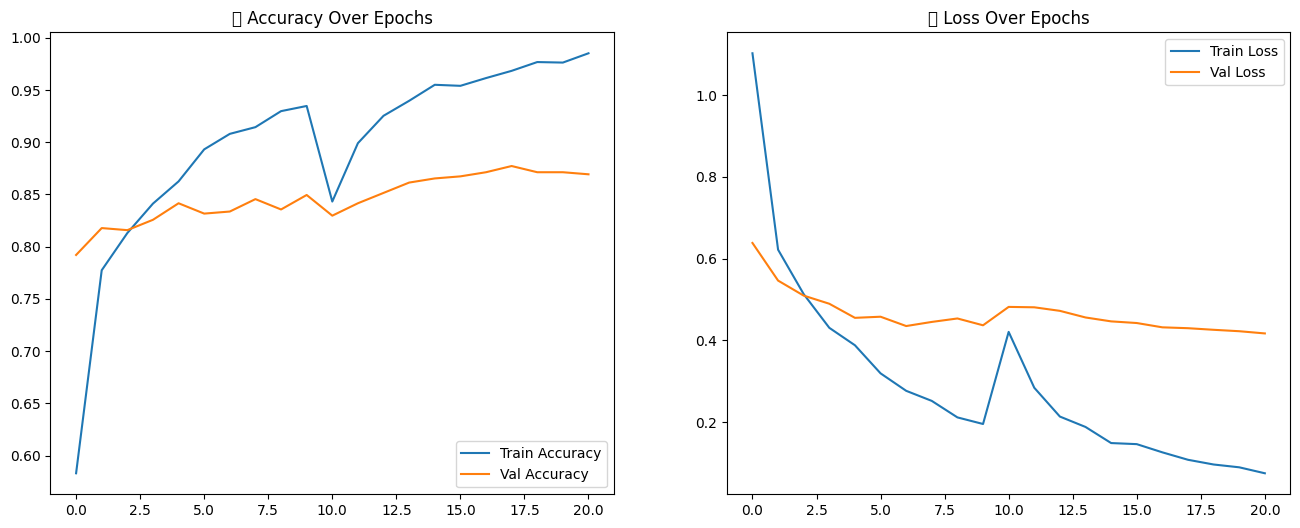

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']

loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('📈 Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('📉 Loss Over Epochs')
plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 97s 6s/step
📊 Classification Report:

              precision    recall  f1-score   support

   cardboard       0.91      0.90      0.91        83
       glass       0.88      0.85      0.87       103
       metal       0.85      0.86      0.85        78
       paper       0.87      0.94      0.91       124
     plastic       0.87      0.85      0.86        88
       trash       0.71      0.59      0.64        29

    accuracy                           0.87       505
   macro avg       0.85      0.83      0.84       505
weighted avg       0.87      0.87      0.87       505



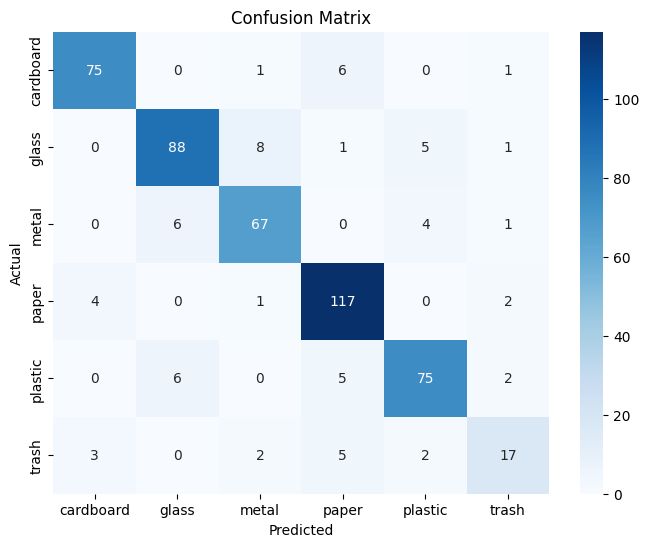

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ⚠️ Only works if dataset not shuffled and batched
val_images = []
val_labels = []

for images, labels in val_ds.unbatch().take(1000):  # adjust number if needed
    val_images.append(images.numpy())
    val_labels.append(labels.numpy())

val_images = np.array(val_images)
val_labels = np.array(val_labels)

# ✅ Predict classes
pred_probs = model.predict(val_images, verbose=1)
pred_labels = np.argmax(pred_probs, axis=1)

# ✅ Classification report
print("📊 Classification Report:\n")
print(classification_report(val_labels, pred_labels, target_names=class_names))

# ✅ Confusion Matrix
cm = confusion_matrix(val_labels, pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


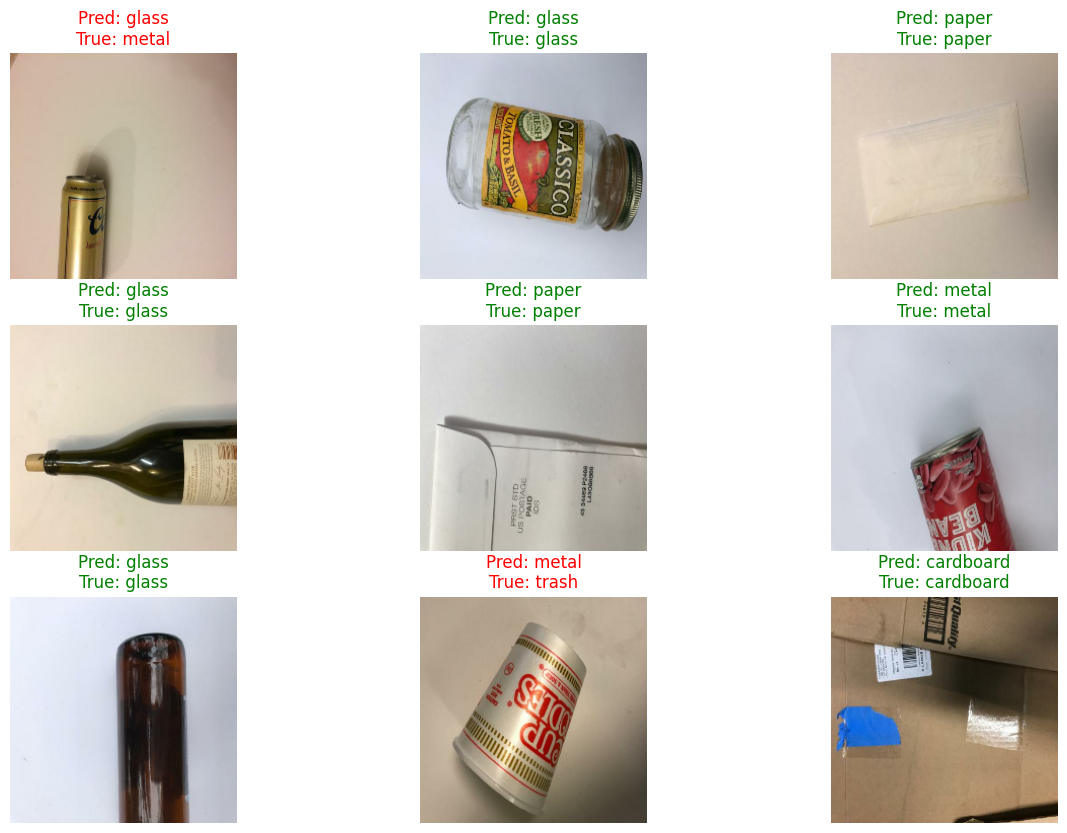

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Take a few batches from the validation dataset
for images, labels in val_ds.take(1):
    preds = model.predict(images)
    pred_labels = np.argmax(preds, axis=1)
    true_labels = labels.numpy()

    plt.figure(figsize=(15, 10))
    for i in range(9):  # Show 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        pred_class = class_names[pred_labels[i]]
        true_class = class_names[true_labels[i]]
        color = "green" if pred_class == true_class else "red"
        plt.title(f"Pred: {pred_class}\nTrue: {true_class}", color=color)
        plt.axis("off")
    break


In [ ]:
# Save the model
model.save("garbage_classifier_densenet.h5")
print("✅ Model saved as 'garbage_classifier_densenet.h5'")


✅ Model saved as 'garbage_classifier_densenet.h5'
